F1 score: 0.733
AUC score: 0.725


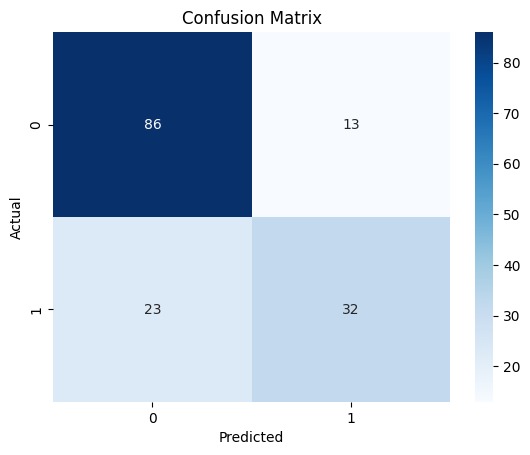

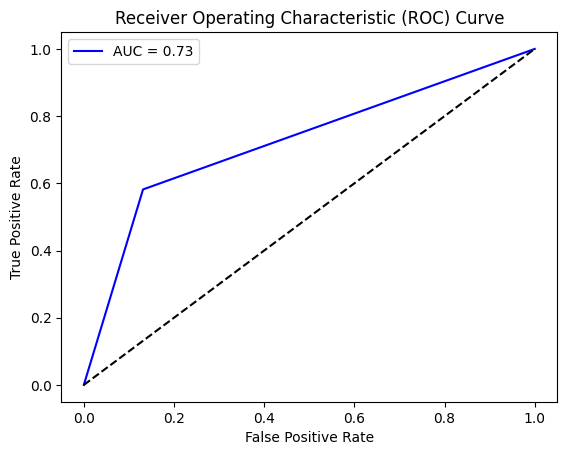

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression

#Data Insert
###############################################################################
df = pd.read_csv('diabetes.csv')

# Target Goal
X = df.drop('Outcome', axis=1)
y = df['Outcome']

#Scaling 
for column in X:
    X[column] = (X[column] - X[column].min()) / (X[column].max() - X[column].min())
    X[column] = (X[column] - X[column].mean())

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logReg = LogisticRegression(random_state=42)
logReg.fit(X_train, y_train)
y_pred=logReg.predict(X_test)

################################################################################
#Accuracy
# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 score: {f1:.3f}")

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
AUC = roc_auc_score(y_test, y_pred, multi_class='ovo')
print(f"AUC score: {AUC:.3f}")

# confusion matrix
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot the ROC curve
plt.plot(fpr, tpr, color='blue', label=f'AUC = {AUC:.2f}')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()